# 依赖

In [19]:
import pylab
import numpy as np
import pandas as pd
from scipy.fftpack import fft,fftshift,ifft,fftfreq
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft,fftfreq
from statsmodels.tsa.stattools import adfuller

%matplotlib inline

# 读取数据

In [17]:
y = pd.read_csv('./ExtWeldMeasureProt2_V.csv',header=0, sep=',')
y = y[['dateTime','iActual2','pha2']]

#转换成时间序列数据
y['dateTime'] = pd.to_datetime(y['dateTime'],format='%Y-%m-%d %H:%M:%S')
y.index = y['dateTime']
y = y[['iActual2','pha2']]
y.sort_index()

,iActual2,pha2
dateTime,,
2020-02-17 16:09:36.780,7.84,43.17
2020-02-17 16:09:38.730,8.03,41.86
2020-02-17 16:09:40.860,8.04,41.26
2020-02-17 16:09:42.810,7.85,40.89
2020-02-17 16:10:02.750,7.82,44.00
2020-02-17 16:10:04.110,7.83,41.66
2020-02-17 16:10:05.780,7.82,44.69
2020-02-17 16:10:07.640,7.82,43.71
2020-02-17 16:10:09.290,7.82,41.24


# 数据预处理

In [ ]:
y['dateTime'] = pd.to_datetime(y['dateTime'],format='%Y-%m-%d %H:%M:%S')
y.index = y['dateTime']
y = y[['iActual2','pha2']]
y.sort_index()

# 时序检测

## 平稳性检验

时间序列建模的第一步是消除数据中存在的趋势或周期的影响，以使其平稳。平稳系列是指系列的平均值不再是一个有关于时间的函数。随着趋势数据的增加以及时间的推移，系列的平均值会随时间而增加或减少 (比如随着时间推移房价的稳步上升)。对于周期性数据，系列的平均值随周期波动 (比如每24小时中，温度的上升和降低),有两种方法可用于实现平稳：差分数据或线性回归。差分数据指的是，你计算了两个连续观测中的差异；而线性回归则是，你可以在模型中为了周期性组件采用二进制指示器变量.在我们决定使用哪种方法之前，让我们来研究一下我们的数据。

adf_test的返回值\n
Test statistic：代表检验统计量\n
p-value：代表p值检验的概率\n
Lags used：使用的滞后k，autolag=AIC时会自动选择滞后\n
Number of Observations Used：样本数量\n
Critical Value(5%) : 显著性水平为5%的临界值。\n
(1)假设是存在单位根，即不平稳；\n
(2)显著性水平，1%：严格拒绝原假设；5%：拒绝原假设，10%类推。\n
(3)看P值和显著性水平a的大小，p值越小，小于显著性水平的话，就拒绝原假设，认为序列是平稳的；大于的话，不能拒绝，认为是不平稳的\n
(4)看检验统计量和临界值，检验统计量小于临界值的话，就拒绝原假设，认为序列是平稳的；大于的话，不能拒绝，认为是不平稳的

In [59]:
def test_stationarity(timeseries):
  
    rolmean = timeseries.rolling(15).mean()
    rolstd = timeseries.rolling(15).std()
  
    # plot rolling statistics
    fig = plt.figure()
    fig.add_subplot()
    
    orig = plt.plot(timeseries,color='blue',label='Orignal')
    mean = plt.plot(rolmean,color='red',label='rolling mean')
    std = plt.plot(rolstd, color='black', label='Rolling standard deviation')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard deviation')
    plt.show(block=False)
    
    # Dickey_Fuller test:
    
    print('Results of Dickey-Fuller Test:')
    timeseries1 = np.array(timeseries)
    print(timeseries1.shape)
    dftest = adfuller(timeseries1, autolag='AIC')
    # dftestd的abs输出前一项依次为检验值、p值、滞后数、使用的观测值、各个置信度下的临界值
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-values',
                                            '#Lags Used','Number of Observation Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key]=value
    
    return dfoutput

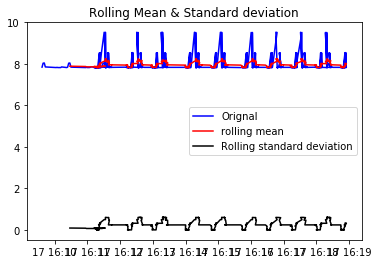

Results of Dickey-Fuller Test:
(603,)
Test Statistic               -6.374842e+00
p-values                      2.297334e-08
#Lags Used                    1.900000e+01
Number of Observation Used    5.830000e+02
Critical value (1%)          -3.441616e+00
Critical value (5%)          -2.866510e+00
Critical value (10%)         -2.569417e+00
dtype: float64


In [61]:
dfout = test_stationarity(y['iActual2'])
print(dfout)

Dickey-Fuller检验结果解读：p_value小于0.05，可以认为该序列为平稳时间序列，不需要再进行平稳化。

## 白噪声检验

In [56]:
from statsmodels.stats.diagnostic import acorr_ljungbox

def test_stochastic(ts,lag):
    p_value = acorr_ljungbox(ts,lags=lag)
    
    return p_value

In [63]:
test_stochastic(y['iActual2'],[6,12])

(array([ 60.1358979 , 112.18482307]), array([4.22377300e-11, 2.21036817e-18]))

白噪声检验结果解读：延迟6阶的p值<0.05，因此可以拒绝原假设，认为该序列不是白噪声序列

# 傅里叶变换提取特征

## 频谱

In [111]:
Y = fft(y,n=10)

In [115]:
type(Y)

numpy.ndarray

In [116]:
print(y.shape,Y.shape)

(603, 2) (603, 10)


In [66]:
shift_Y = fftshift(Y)

In [67]:
shift_Y

array([[-32.25+0.j,  47.93+0.j],
       [-20.84+0.j,  39.88+0.j],
       [-22.41+0.j,  38.05+0.j],
       ...,
       [-22.66+0.j,  39.72+0.j],
       [-25.56+0.j,  41.2 +0.j],
       [-30.56+0.j,  46.2 +0.j]])

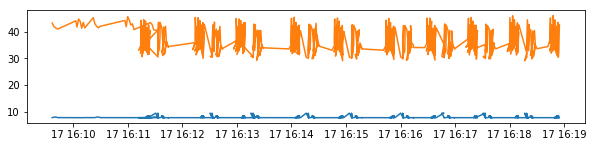

In [69]:
pos_Y_from_fft = Y[:Y.size//2]
pos_Y_from_shift = shift_Y[shift_Y.size//12]
plt.figure(figsize=(10,12))
plt.subplot(511)
plt.plot(y)

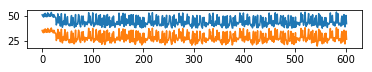

In [70]:
plt.subplot(512)
plt.plot(np.abs(Y))

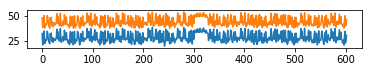

In [71]:
plt.subplot(513)
plt.plot(np.abs(shift_Y))

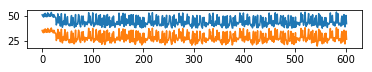

In [72]:
plt.subplot(514)
plt.plot(np.abs(pos_Y_from_fft))

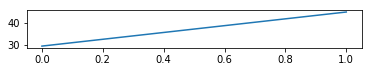

In [73]:
plt.subplot(515)
plt.plot(np.abs(pos_Y_from_shift))

## 功率谱

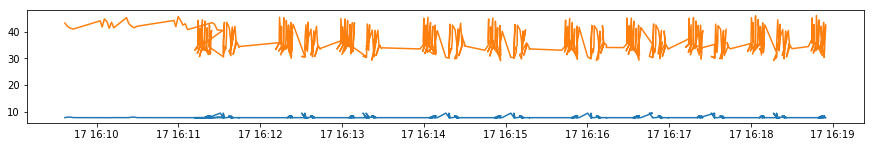

In [76]:
num_fft = 1024
Y_1 = fft(y, num_fft)
Y_1 = np.abs(Y_1)

# power spectrum
ps = Y**2/num_fft

#power spectrum using collerate
cor_y = np.correlate(y['iActual2'],y['iActual2'],'same')
cor_Y = fft(cor_y,num_fft)

ps_cor = np.abs(cor_Y)
ps_cor = ps_cor/np.max(ps_cor)

plt.figure(figsize=(15,12))
plt.subplot(511)
plt.plot(y)

 ...]

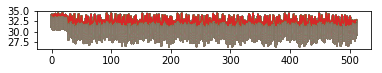

In [77]:
plt.subplot(512)
plt.plot(20*np.log10(Y_1[:num_fft//2]))

C:\Users\Schwarz\AppData\Local\conda\conda\envs\py36_tensorflow\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


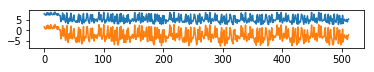

In [78]:
plt.subplot(513)
plt.plot(20*np.log10(ps[:num_fft//2]))

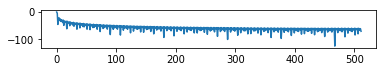

In [79]:
plt.subplot(514)
plt.plot(20*np.log10(ps_cor[:num_fft//2]))

## 倒频谱

In [81]:
spectrum = np.fft.fft(y, n=num_fft)
ceps = np.fft.ifft(np.log(np.abs(spectrum))).real

In [82]:
ceps

array([[ 3.76514581e+00,  9.08037989e-02, -8.24532990e-03, ...,
         9.98276371e-04, -8.24532990e-03,  9.08037989e-02],
       [ 3.73433072e+00,  9.59149546e-02, -9.19967852e-03, ...,
         1.17651566e-03, -9.19967852e-03,  9.59149546e-02],
       [ 3.71989351e+00,  9.74309258e-02, -9.49278531e-03, ...,
         1.23318782e-03, -9.49278531e-03,  9.74309258e-02],
       ...,
       [ 3.66509893e+00,  1.00102407e-01, -1.00204918e-02, ...,
         1.33743379e-03, -1.00204918e-02,  1.00102407e-01],
       [ 3.75044481e+00,  9.21485661e-02, -8.49135823e-03, ...,
         1.04328865e-03, -8.49135823e-03,  9.21485661e-02],
       [ 3.53514535e+00,  1.13994169e-01, -1.29946706e-02, ...,
         1.97508890e-03, -1.29946706e-02,  1.13994169e-01]])

# 异常检测

## 无监督学习

### 基于密度估计的异常检测

In [85]:
from sklearn.neighbors.kde import KernelDensity

kde = KernelDensity(kernel='gaussian')
kde = kde.fit(y)
kde_X = kde.score_samples(y)

In [86]:
kde_X

array([-4.0615053 , -3.94720556, -3.99132697, -4.01884305, -4.29615229,
       -3.94568866, -4.54235103, -4.20715216, -3.98347912, -4.13299262,
       -3.96921454, -4.78234735, -4.01209334, -3.94454038, -3.9794096 ,
       -3.93063384, -4.33480941, -3.93720827, -5.05832105, -4.31211745,
       -3.93989353, -4.00274398, -4.03600916, -4.09854123, -3.96910931,
       -4.05586402, -4.0722116 , -4.07465085, -3.26708719, -3.13642285,
       -4.10847521, -4.35793833, -3.14788062, -3.45505988, -3.97349615,
       -3.08036795, -3.55480861, -3.09008796, -4.42340288, -3.08113911,
       -3.93702879, -3.09715506, -3.93778776, -3.2091247 , -4.22277407,
       -4.26788749, -3.08243209, -3.27661162, -3.16336924, -4.22809134,
       -3.97059932, -3.10592273, -3.14268971, -3.62568472, -3.72934   ,
       -3.08366252, -3.67866572, -4.2390812 , -3.94580364, -3.6705893 ,
       -4.2298879 , -4.06940377, -3.08144295, -4.45728759, -3.98643716,
       -4.77624615, -4.13846716, -3.61462969, -3.11672522, -3.08

In [88]:
from scipy.stats.mstats import mquantiles
alpha_set = 0.95
tau_kde = mquantiles(kde_X,1.-alpha_set)
n_samples,n_features = y.shape
y_range = np.zeros((n_features,2))
y_range[:,0] = np.min(y, axis=0)-1
y_range[:,1] = np.max(y, axis=0)+1
h = 0.1 # step size of the mash

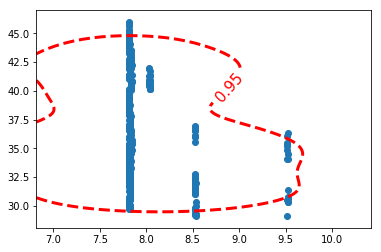

In [96]:
x_min,x_max = y_range[0]
y_min,y_max = y_range[1]
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                    np.arange(y_min,y_max,h))

grid = np.c_[xx.ravel(),yy.ravel()]
Z_kde = kde.score_samples(grid)
Z_kde = Z_kde.reshape(xx.shape)
plt.figure()
c_0 = plt.contour(xx,yy,Z_kde,levels=tau_kde, colors='red',linewidths=3)
plt.clabel(c_0,inline=1,fontsize=15,fmt={tau_kde[0]:str(alpha_set)})
plt.scatter(y['iActual2'],y['pha2'])

### 隔离森林

C:\Users\Schwarz\AppData\Local\conda\conda\envs\py36_tensorflow\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
C:\Users\Schwarz\AppData\Local\conda\conda\envs\py36_tensorflow\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


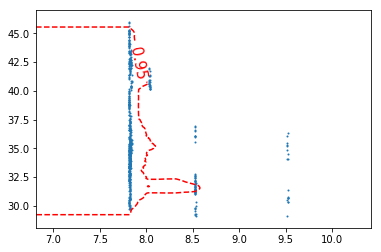

In [106]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=300,contamination=0.10)
iforest = iforest.fit(y)

Z_iforest = iforest.decision_function(grid)
Z_iforest = Z_iforest.reshape(xx.shape)

plt.figure()
c_0 = plt.contour(xx,yy,Z_iforest,
                  levels=[iforest.threshold_],
                  colors = 'red',linewidth=3)
plt.clabel(c_0,inline=1, fontsize=15,
           fmt={iforest.threshold_:str(alpha_set)})
plt.scatter(y['iActual2'],y['pha2'],s=1.)

## 有监督学习

### 基于单类SVM的离群点检测

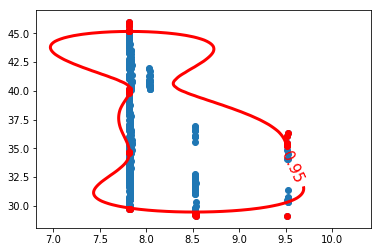

In [100]:
from sklearn.svm import OneClassSVM

nu = 0.05
ocsvm = OneClassSVM(kernel='rbf',gamma=0.05, nu=nu)
ocsvm.fit(y)
y_outliers = y[ocsvm.predict(y)==-1]
Z_ocsvm = ocsvm.decision_function(grid)
Z_ocsvm = Z_ocsvm.reshape(xx.shape)
plt.figure()
c_0 = plt.contour(xx,yy,Z_ocsvm,levels=[0],colors='red', linewidths=3)
plt.clabel(c_0,inline=1,fontsize=15,fmt={0:str(alpha_set)})
plt.scatter(y['iActual2'],y['pha2'])
plt.scatter(y_outliers['iActual2'],y_outliers['pha2'],color='red')

隔离森林是一种基于树的异常检测算法。 该算法构建了许多随机树，其基本原理是，如果样本被隔离，在非常少量的随机分割之后，它应该单独存在于叶子中。 隔离森林根据样本最终所在的树的深度建立异常得分。

# 参考资料

In [ ]:
https://www.cnblogs.com/bradleon/p/6832867.html